In [116]:
import matplotlib.pyplot as plt
import re
from typing import List, Tuple, Dict
import numpy as np
import math

In [117]:
CONFIGS = [
    "EntanglingIPrefetcherNoPrefetcherBaselineConfig",

    "EntanglingIPrefetcherTableSize002Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize002Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize002Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets8WaysConfig",

    "EntanglingIPrefetcherICacheSize016Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize016Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize016Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize016Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig",

    "EntanglingIPrefetcherNoEntanglingConfig",
    "EntanglingIPrefetcherNoEntanglingSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoSmallICacheConfig",
]

CONFIG_PAIRS = [
    ("EntanglingIPrefetcherNoPrefetcherBaselineConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),

    ("EntanglingIPrefetcherTableSize002Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize002Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize002Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),

    ("EntanglingIPrefetcherICacheSize016Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize016Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize016Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize016Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize032Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize032Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize032Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize032Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig"),

    ("EntanglingIPrefetcherNoEntanglingConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherNoEntanglingSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_NO_PREFETCHER_BASELINE = [
    (0,   "0", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_NO_PREFETCHER_M1_BASELINE = [
    (-1,   "No Pref.", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_TABLE_SIZE_2_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets2WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets2WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets2WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets2WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets2WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets2WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets2WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets2WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets2WaysConfig"),
]

TREND_TABLE_SIZE_4_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets4WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets4WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets4WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets4WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets4WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets4WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets4WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets4WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets4WaysConfig"),
]

TREND_TABLE_SIZE_8_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets8WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets8WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets8WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets8WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets8WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets8WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets8WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets8WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets8WaysConfig"),
]

TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets2WaysWithPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets2WaysWithPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig"),
]

TREND_CACHE_SIZE_2_WAYS_NO_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets2WaysNoPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets2WaysNoPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig"),
]

TREND_CACHE_SIZE_4_WAYS_WITH_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets4WaysWithPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets4WaysWithPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig"),
]

TREND_CACHE_SIZE_4_WAYS_NO_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets4WaysNoPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets4WaysNoPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig"),
]

TREND_MAX_ENTANGLINGS_UNCOMPRESSED = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1UncompressedConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2UncompressedConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3UncompressedConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4UncompressedConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5UncompressedConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6UncompressedConfig"),
]

TREND_MAX_ENTANGLINGS_UNCOMPRESSED_ONLY_HEAD = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadConfig"),
]

TREND_MAX_ENTANGLINGS_COMPRESSED = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1CompressedConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2CompressedConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3CompressedConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4CompressedConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5CompressedConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6CompressedConfig"),
]

TREND_MAX_ENTANGLINGS_COMPRESSED_ONLY_HEAD = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadConfig"),
]

OUTPUT_PATTERN = """
Cycles: (\d+)
Time: (\d+)
Instret: (\d+)
I\$ response: (\d+)
I\$ miss: (\d+)
Demand refill: (\d+)
Prefetch refill: (\d+)
Prefetch consumed: (\d+)
Late prefetch: (\d+)
Early prefetch: (\d+)
No prefetch: (\d+)
Erroneous prefetch: (\d+)
Demand miss cycles: (\d+)
Branch midpredict: (\d+)
"""

BENCHMARKS = [
    "radiosity",
    "barnes",
    "water_spatial",
    "ocean_cp",
]

RUNS = [
    #"Core",
    #"Core2",
    "Ext",
]

BENCHMARK_COLORS = {
    "radiosity": "red",
    "barnes": "brown",
    "water_spatial": "blue",
    "ocean_cp": "cyan",
    "average": "black",
}

BENCHMARK_MARKERS = {
    "radiosity": "x",
    "barnes": "s",
    "water_spatial": "d",
    "ocean_cp": "o",
    "average": "p",
}

BENCHMARK_NAMES = {
    "radiosity": "Radiosity",
    "barnes": "Barnes",
    "water_spatial": "Water",
    "ocean_cp": "Ocean",
    "average": "Average",
}

BENCHMARK_LINESTYLES = {
    "radiosity": "-",
    "barnes": "-",
    "water_spatial": "-",
    "ocean_cp": "-",
    "average": ":",
}

BENCHMARK_BASELINE_LINESTYLES = {
    "radiosity": "--",
    "barnes": "--",
    "water_spatial": "--",
    "ocean_cp": "--",
    "average": "-.",
}

BENCHMARK_ALPHAS = {
    "radiosity": 1,
    "barnes": 1,
    "water_spatial": 1,
    "ocean_cp": 1,
    "average": 0.5,
}

METRIC_NAMES = {
    "demand_miss_cycles": "Number of cycles spend handling demand misses",
    "frac_demand_miss_cycles": "Proportion cycles spent handling demand misses",
    "erroneous_prefetch": "Number of executed, erroneous prefetches",
    "frac_erroneous_prefetch": "Proportion of executed prefetches which were erroneous",
    "no_prefetch": "Number of cache misses without a (late) prefetch",
    "frac_no_prefetch": "Proportion of cache misses without a (late) prefetch",
    "early_prefetch": "Number of executed prefetches which were early",
    "frac_early_prefetch": "Proportion  of executed prefetches which were early",
    "late_prefetch": "Number of proposed prefetches which were late",
    "frac_late_prefetch": "Proportion of proposed prefetches which were late",
    "frac_miss": "Miss rate",
}

In [118]:
def import_file(path: str) -> Dict[str, int]:
    output = ""
    with open(path, "r") as fp:
        output = fp.read()
    matches = re.search(OUTPUT_PATTERN, output, re.MULTILINE)      
    assert(matches is not None)
    return {
        "cycles":             int(matches.group(1)),
        "time":               int(matches.group(2)),
        "instret":            int(matches.group(3)),
        "response":           int(matches.group(4)),
        "miss":               int(matches.group(5)),
        "demand_refill":      int(matches.group(6)),
        "prefetch_refill":    int(matches.group(7)),
        "prefetch_consumed":  int(matches.group(8)),
        "late_prefetch":      int(matches.group(9)),
        "early_prefetch":     int(matches.group(10)),
        "no_prefetch":        int(matches.group(11)),
        "erroneous_prefetch": int(matches.group(12)),
        "demand_miss_cycles": int(matches.group(13)),
        "branch_midpredict":  int(matches.group(14)),
    }

In [119]:
def add_simple_metrics(metrics: Dict[str, int]) -> Dict[str, int]:
    metrics["frac_demand_miss_cycles"] = metrics["demand_miss_cycles"] / metrics["cycles"]
    metrics["frac_miss"] = metrics["miss"] / metrics["response"]
    metrics["frac_late_prefetch"] = metrics["late_prefetch"] / metrics["prefetch_consumed"] if metrics["prefetch_consumed"] > 0 else 0
    metrics["frac_early_prefetch"] = metrics["early_prefetch"] / metrics["prefetch_refill"]  if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_erroneous_prefetch"] = metrics["erroneous_prefetch"] / metrics["prefetch_refill"]  if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_no_prefetch"] = metrics["no_prefetch"] / metrics["miss"]
    metrics["cpi"] = metrics["cycles"] / metrics["instret"]
    metrics["useless_prefetches"] = metrics["early_prefetch"] + metrics["erroneous_prefetch"]
    metrics["frac_useless_prefetches"] = metrics["useless_prefetches"] / metrics["prefetch_refill"] if metrics["prefetch_refill"] > 0 else 0
    return metrics

In [120]:
def add_relative_metrics(data: Dict[str, Dict[str, Dict[str, int]]]):
    for prefetcher_config, baseline_config in CONFIG_PAIRS:
        for benchmark in BENCHMARKS:
            data[prefetcher_config][benchmark]["speedup"] = data[baseline_config][benchmark]["time"] / data[prefetcher_config][benchmark]["time"]
            data[prefetcher_config][benchmark]["frac_miss_change"] = data[prefetcher_config][benchmark]["frac_miss"] / data[baseline_config][benchmark]["frac_miss"] 
            data[prefetcher_config][benchmark]["frac_demand_miss_cycles_change"] = data[prefetcher_config][benchmark]["demand_miss_cycles"] / data[baseline_config][benchmark]["demand_miss_cycles"] 
            data[prefetcher_config][benchmark]["misses_eliminated"] = data[baseline_config][benchmark]["miss"] - data[prefetcher_config][benchmark]["miss"]
            data[prefetcher_config][benchmark]["coverage"] = data[prefetcher_config][benchmark]["misses_eliminated"] / data[baseline_config][benchmark]["miss"]
            data[prefetcher_config][benchmark]["accuracy"] = data[prefetcher_config][benchmark]["misses_eliminated"] / (data[prefetcher_config][benchmark]["misses_eliminated"] + data[prefetcher_config][benchmark]["useless_prefetches"]) \
                if (data[prefetcher_config][benchmark]["misses_eliminated"] + data[prefetcher_config][benchmark]["useless_prefetches"]) > 0 else 0
    return data

In [121]:
def add_stats_benchmarks(data: Dict[str, Dict[str, Dict[str, int]]]):
    for config in CONFIGS:
        data[config]["average"] = {}
        data[config]["stdev"] = {}
        data[config]["max"] = {}
        data[config]["min"] = {}
        for k in data[config][BENCHMARKS[0]]:
            data[config]["average"][k] = sum(data[config][benchmark][k] for benchmark in BENCHMARKS)/len(BENCHMARKS)
            data[config]["stdev"][k] = math.sqrt(sum((data[config][benchmark][k]-data[config]["average"][k])**2 for benchmark in BENCHMARKS)/len(BENCHMARKS))
            data[config]["max"][k] = max(data[config][benchmark][k] for benchmark in BENCHMARKS)
            data[config]["min"][k] = min(data[config][benchmark][k] for benchmark in BENCHMARKS)
    return data

In [122]:
RESULTS = {
    run: add_stats_benchmarks(add_relative_metrics({
        config: {
            benchmark: add_simple_metrics(
                import_file(f"/local/scratch/ldh35/rocket-chip/evaluation/results/{run}/{config}/{benchmark}.output")
            ) for benchmark in BENCHMARKS
        }
        for config in CONFIGS
    })) for run in RUNS
}

(<Figure size 1500x1000 with 4 Axes>,
 [<Axes: ylabel='Accuracy'>,
  <Axes: ylabel='Coverage'>,
  <Axes: ylabel='Miss rate'>,
  <Axes: ylabel='Speedup'>])

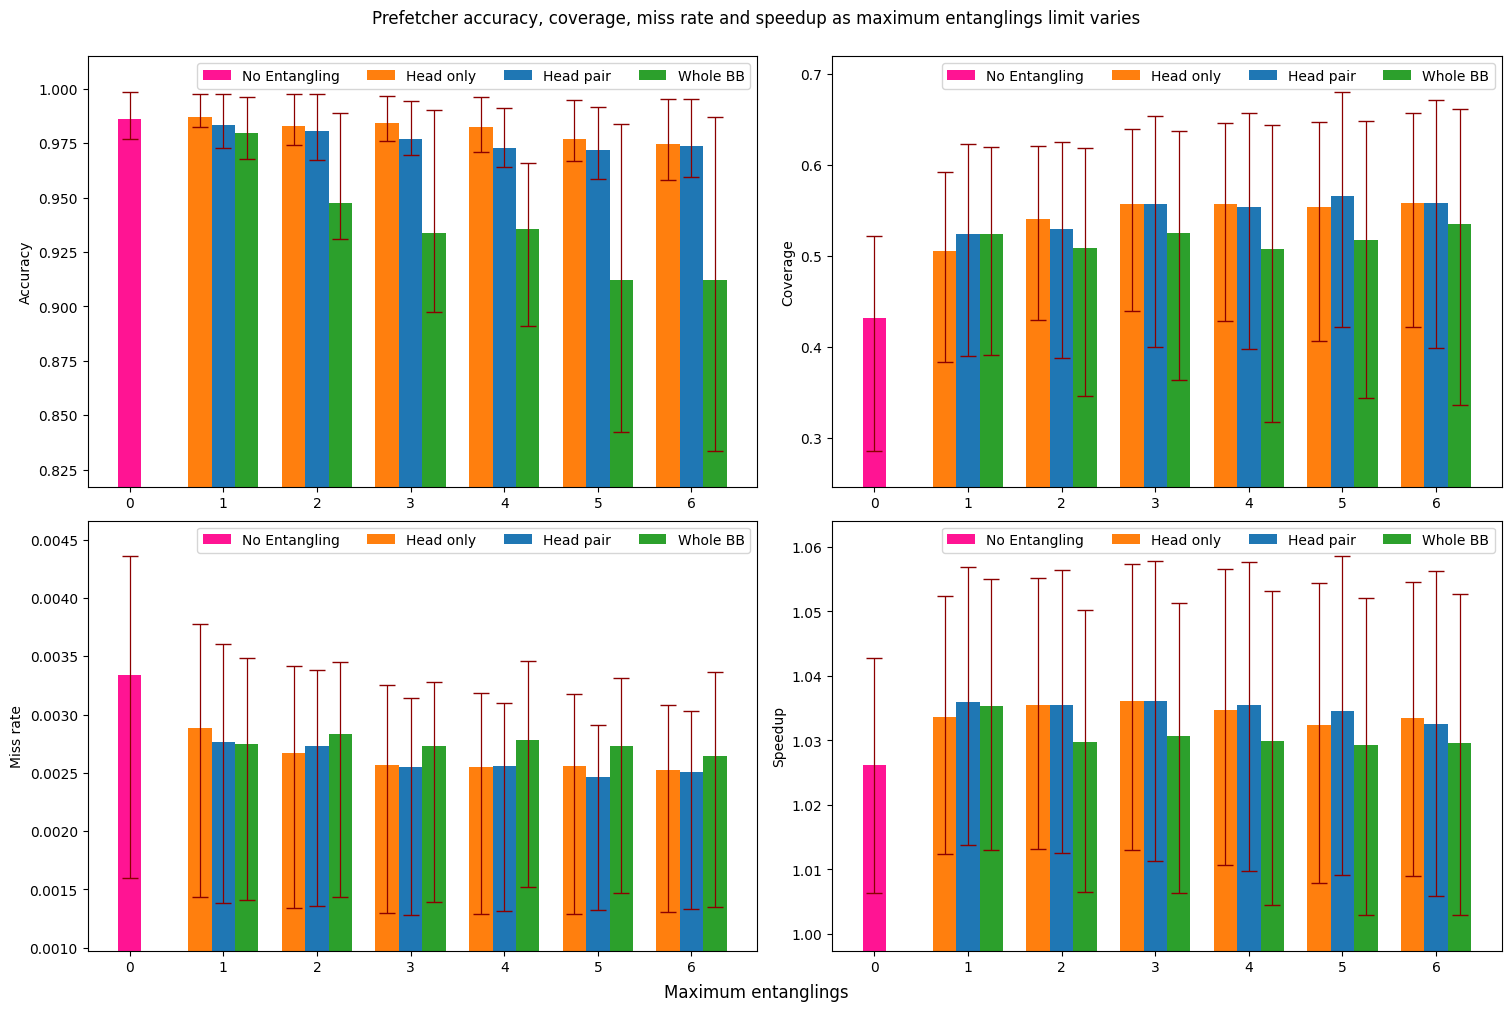

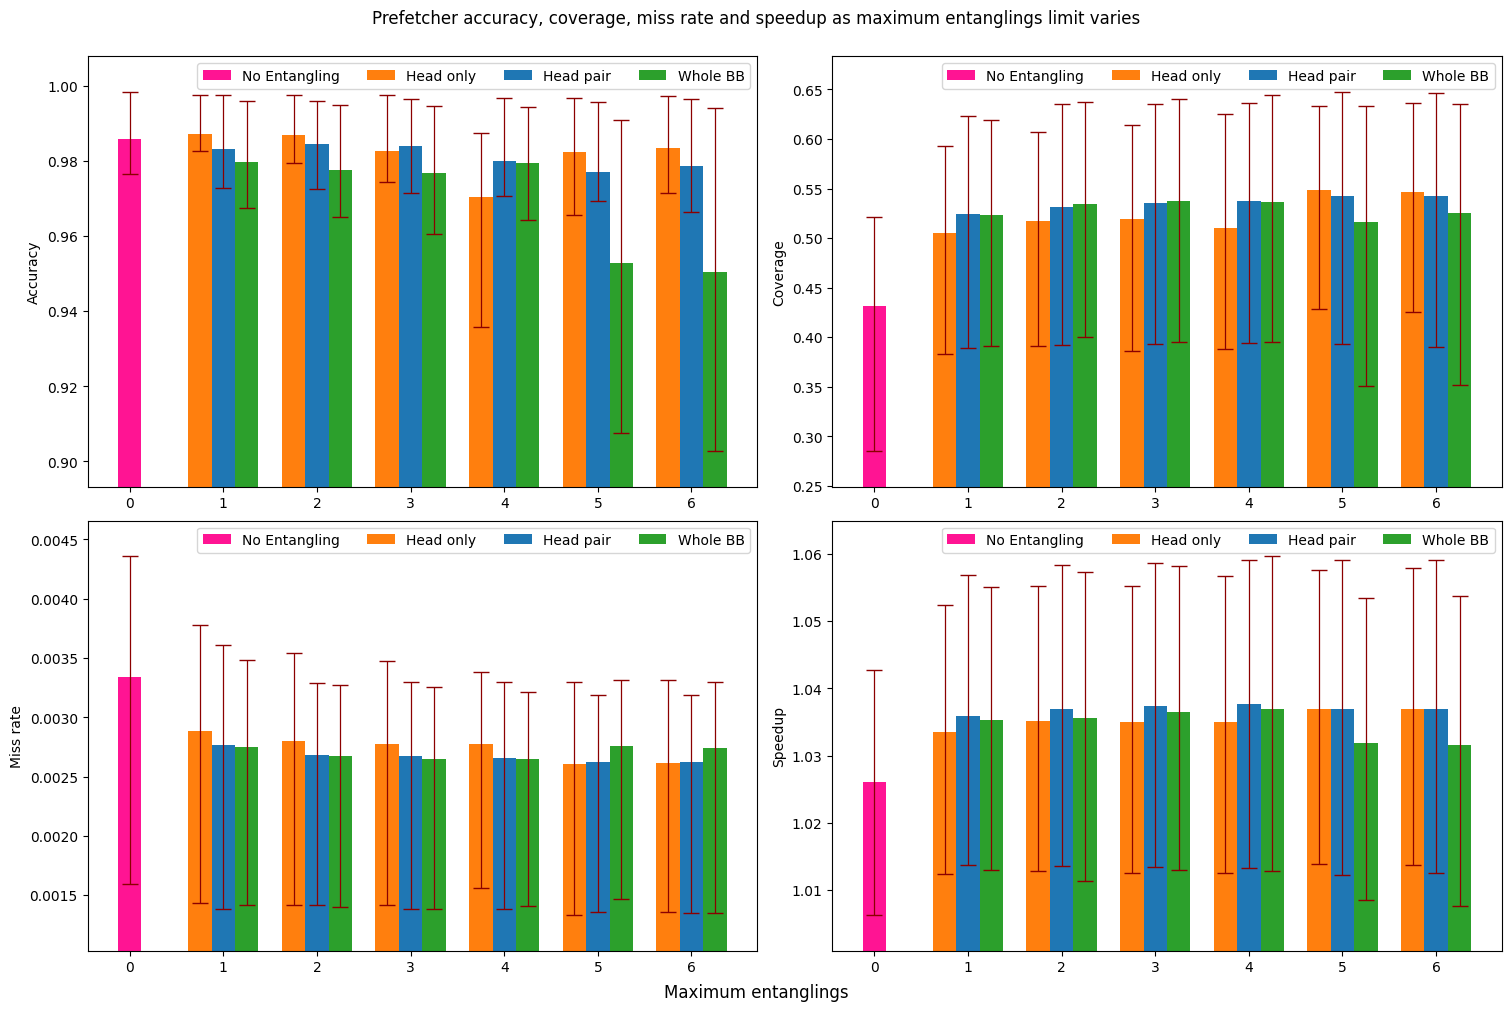

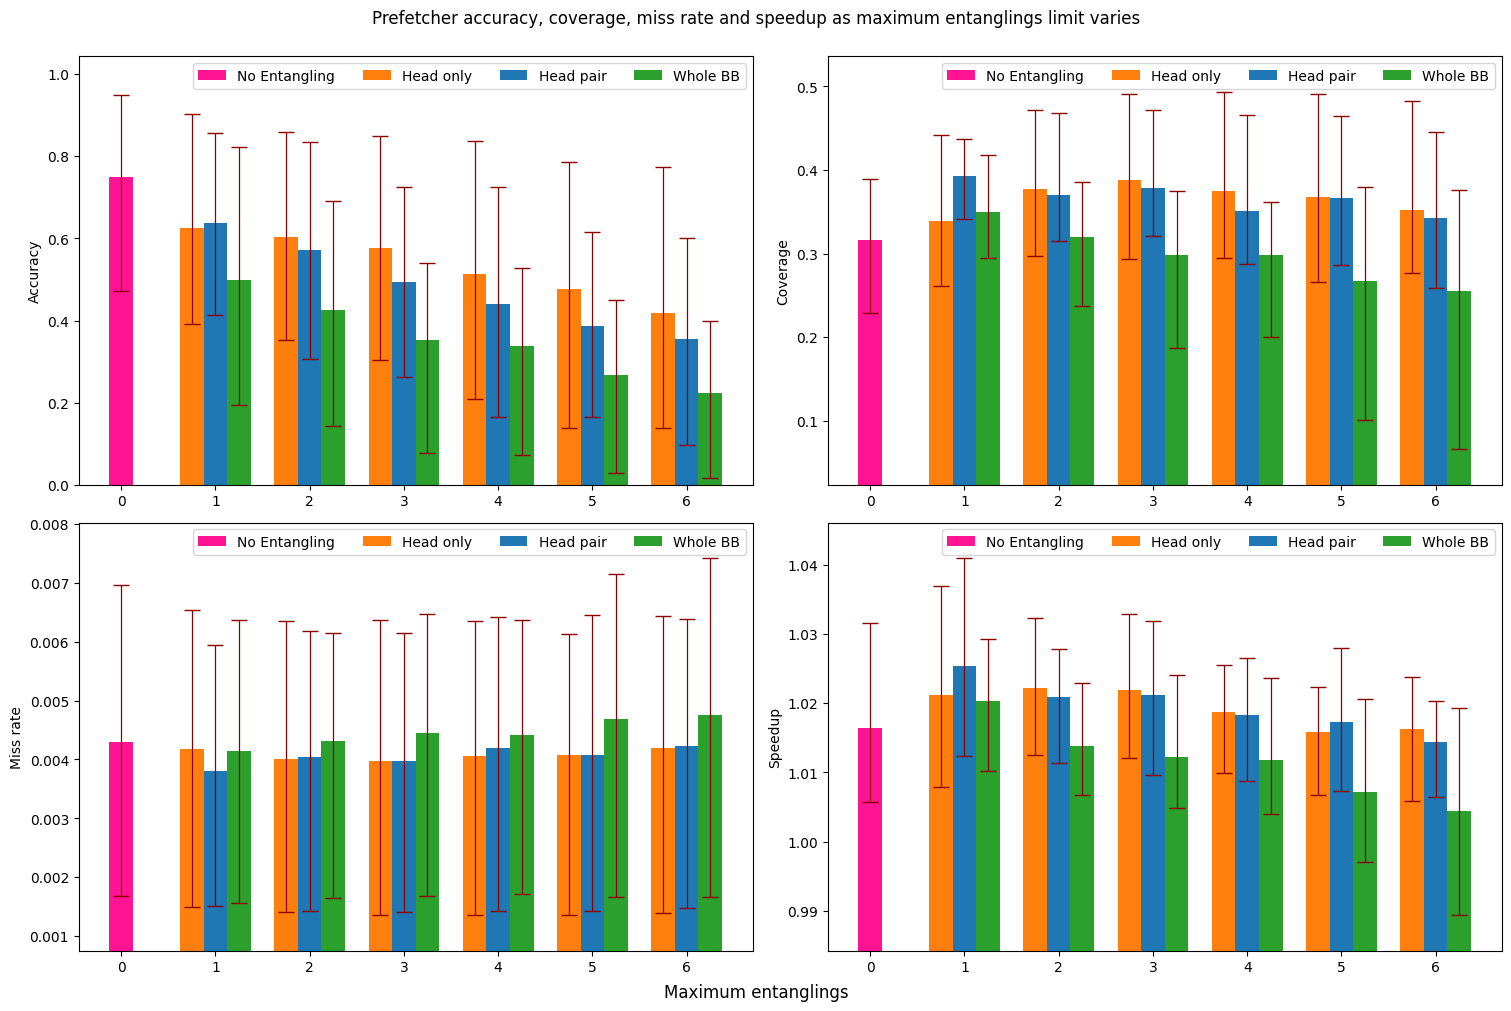

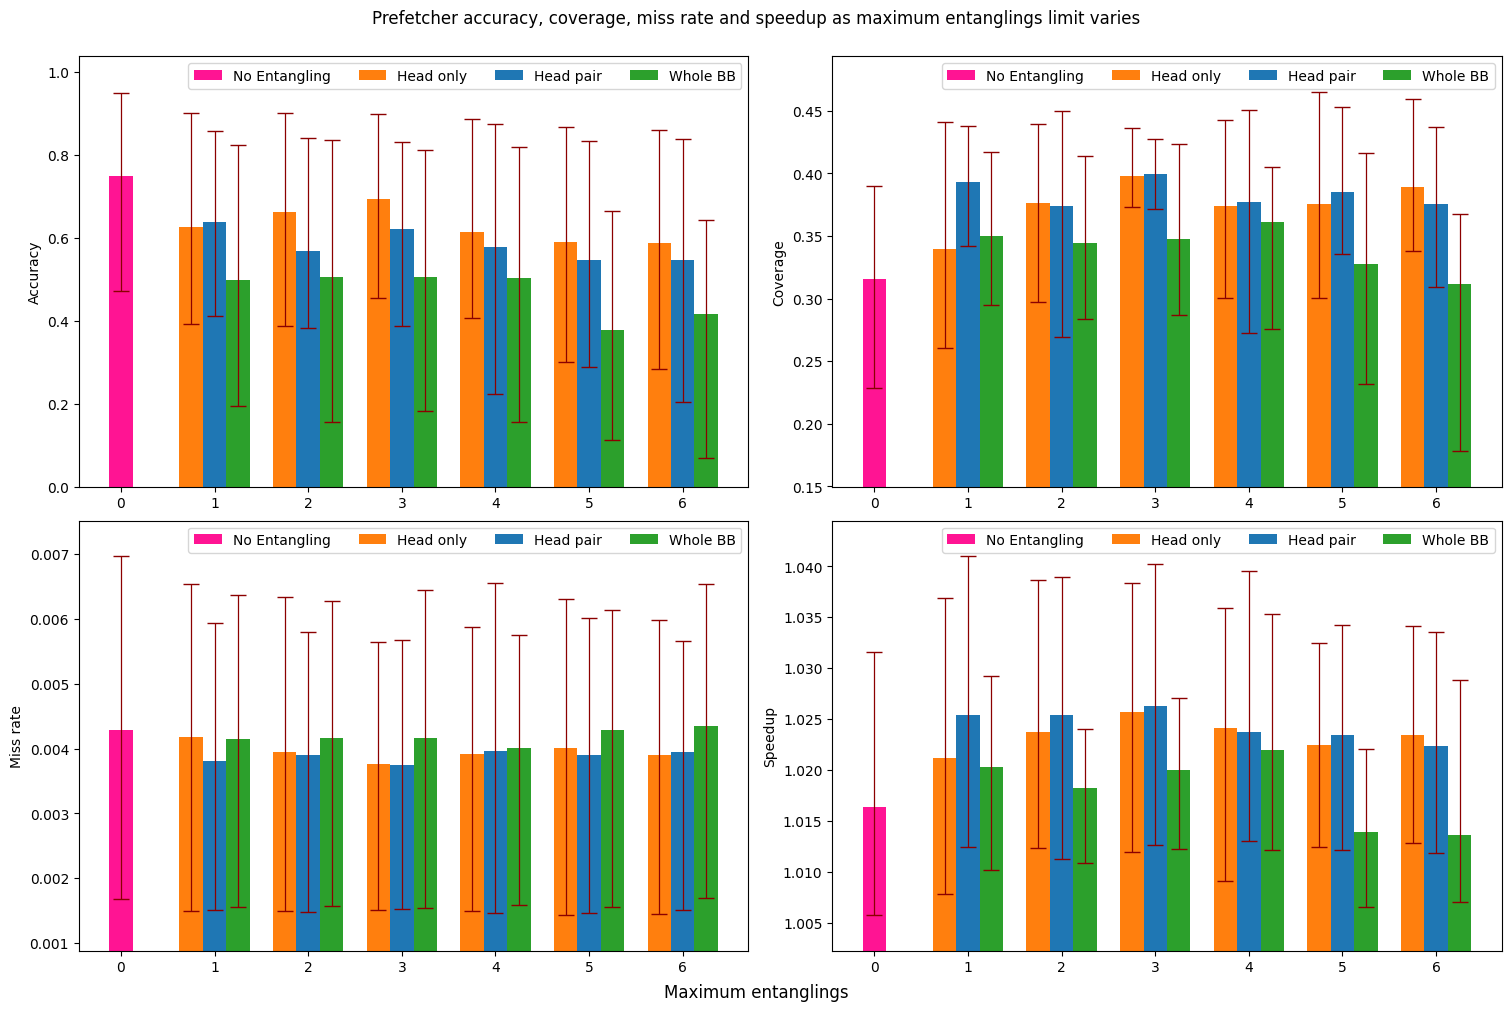

In [140]:
def maxEntanglingsBars(
    ncols=2,
    nrows=2,
    metrics=["accuracy", "coverage", "frac_miss", "speedup"],
    smallICache=False,
    compressed=False,
    run="Ext",
    figsize=(15,10)
):
    fig, axss = plt.subplots(nrows=nrows, ncols=ncols, layout='constrained', figsize=figsize)
    axs = [ax for axs in axss for ax in axs]

    for ax, metric in zip(axs, metrics):
        ydata = []
        config0 = f"EntanglingIPrefetcherNoEntangling{'SmallICache' if smallICache else ''}Config"
        ax.bar(
            x=0, 
            height=RESULTS[run][config0]["average"][metric],
            width=0.25,
            label="No Entangling",
            color="deeppink",
        )
        ax.errorbar(
            x=0,
            y=[RESULTS[run][config0]["average"][metric]],
            yerr=[
                [RESULTS[run][config0]["average"][metric]-RESULTS[run][config0]["min"][metric]], 
                [RESULTS[run][config0]["max"][metric]-RESULTS[run][config0]["average"][metric]]
            ],
            fmt="o",
            color="darkred",
            markersize=0,
            capsize=6,
            elinewidth=0.9,
        )
        ydata.extend([RESULTS[run][config0]["min"][metric], RESULTS[run][config0]["max"][metric]])        
        for i, (variant, label, color) in enumerate([("OnlyHead", "Head only", "C1"), ("OnlyHeadTwo", "Head pair", "C0"), ("", "Whole BB", "C2")]):
            configs=[
                f"EntanglingIPrefetcherMaxEntanglings{maxEntanglings}{'Compressed' if compressed else 'Uncompressed'}{variant}{'SmallICache' if smallICache else ''}Config"
                for maxEntanglings in range(1,7)
            ]
            ax.bar(
                x=np.arange(6) + 0.75 + i*0.25, 
                height=[RESULTS[run][config]["average"][metric] for config in configs],
                width=0.25,
                label=label,
                color=color,
            )
            ax.errorbar(
                x=np.arange(6) + 0.75 + i*0.25,
                y=[RESULTS[run][config]["average"][metric] for config in configs],
                yerr=[
                    [RESULTS[run][config]["average"][metric] - RESULTS[run][config]["min"][metric] for config in configs],
                    [RESULTS[run][config]["max"][metric] - RESULTS[run][config]["average"][metric] for config in configs],
                ],
                fmt="o",
                color="darkred",
                markersize=0,
                capsize=6,
                elinewidth=0.9,
            )
            ydata.extend(RESULTS[run][config]["min"][metric] for config in configs)
            ydata.extend(RESULTS[run][config]["max"][metric] for config in configs)
        r = max(ydata) - min(ydata)
        ax.set_ylim(bottom=max(0, min(ydata)-r/10), top=max(ydata)+r/10)
        ax.set_ylabel(METRIC_NAMES[metric] if metric in METRIC_NAMES else metric.capitalize())
        ax.legend(ncol=4)

    fig.suptitle("Prefetcher accuracy, coverage, miss rate and speedup as maximum entanglings limit varies\n")
    fig.supxlabel("Maximum entanglings")

    return fig, axs

maxEntanglingsBars()
maxEntanglingsBars(compressed=True)
maxEntanglingsBars(smallICache=True)
maxEntanglingsBars(compressed=True, smallICache=True)

